In [31]:
#%% file import pre procesing
import pandas as pd
import numpy as np



#plots
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [32]:
# read in pup merged file 
le16_df = pd.read_excel('le16_p6_calls.xlsx')
le15_df = pd.read_excel('le15_p6_calls.xlsx')

pup_df = pd.concat([le16_df,le15_df])
pup_df

,File,ID,Label,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz),Genotype,Rat
0,D:\Rat Pup call analysis\litter le 16 fmr1\p6\...,1,Flat,True,0.663786,0.066253,0.118018,0.051765,39.141329,38.375563,39.907095,1.531532,0.283794,0.881980,1.020711,-81.251688,0.497346,39.141329,WT,581
1,D:\Rat Pup call analysis\litter le 16 fmr1\p6\...,2,Usv,True,0.785730,0.261688,0.308859,0.047171,38.799453,38.227062,39.944234,1.717172,0.442956,6.590278,1.200113,-80.913806,0.691142,38.799453,WT,581
2,D:\Rat Pup call analysis\litter le 16 fmr1\p6\...,3,Flat,True,0.686565,3.625242,3.668206,0.042965,38.234797,37.979542,38.490053,0.510511,0.150541,2.583063,1.093011,-85.867773,0.619020,38.490053,WT,581
3,D:\Rat Pup call analysis\litter le 16 fmr1\p6\...,4,Flat,True,0.712170,3.797822,3.889587,0.091765,39.853491,39.429551,41.761222,2.331671,0.647557,-15.761049,1.182894,-73.310345,0.786215,40.913342,WT,581
4,D:\Rat Pup call analysis\litter le 16 fmr1\p6\...,5,Flat,True,0.717449,3.994546,4.184364,0.189818,39.930425,39.609670,42.015330,2.405660,0.570155,0.781058,1.437578,-74.431837,0.759753,40.411557,WT,581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,D:\Rat Pup call analysis\litter le15 fmr1\p6\r...,21,Usv,True,0.791685,137.343577,137.381813,0.038235,40.131705,38.503352,40.457375,1.954023,0.585603,-34.828075,1.104252,-94.889522,0.347541,40.457375,KO,568
279,D:\Rat Pup call analysis\litter le15 fmr1\p6\r...,22,Usv,True,0.529396,138.018546,138.123722,0.105176,71.495386,41.830956,73.206795,31.375839,7.664121,-153.880306,3.832734,-100.120865,0.184409,71.495386,KO,568
280,D:\Rat Pup call analysis\litter le15 fmr1\p6\r...,23,Usv,True,0.632794,138.152774,138.201109,0.048335,63.637500,34.737500,72.987500,38.250000,11.911238,-338.581649,5.122670,-102.745680,0.187089,68.737500,KO,568
281,D:\Rat Pup call analysis\litter le15 fmr1\p6\r...,24,Downward_Ramp,True,0.959838,154.734069,154.827010,0.092941,43.560918,40.117880,45.067247,4.949367,1.546142,-53.260751,1.204213,-74.155556,0.754991,45.067247,KO,568


In [33]:
# if row contains iso1 set iso 1 in timepoint column'


pup_df['Timepoint'] = pup_df["File"].str.extract("(iso1|iso2)")[0] #grab isolation from filename
#pup_df['Rat'] = pup_df['File'].str.extract(r'Detections\\(.*?_)') # grab rat name in filename
#('(fxs_calls\.*?)\_')
pup_df['Timepoint'].unique()

array(['iso1', 'iso2'], dtype=object)

# Call Number comparison

In [34]:
# call number compared
pup_df_g = pup_df.groupby(['Genotype','Timepoint']).count() # counts number of rows(calls) per rat
pup_df_g = pup_df_g.reset_index() # adds indices back to columns for graphing


In [35]:
pup_df_rat_avg = pup_df.groupby(['Rat','Genotype','Timepoint']).mean()
pup_df_rat_avg = pup_df_rat_avg.reset_index()
pup_df_rat_avg

C:\Users\User\AppData\Local\Temp\ipykernel_944\4212151507.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pup_df_rat_avg = pup_df.groupby(['Rat','Genotype','Timepoint']).mean()


,Rat,Genotype,Timepoint,ID,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz)
0,563,WT,iso2,31.5,1.0,0.730648,92.745745,92.841796,0.096051,40.920277,39.037219,43.312210,4.274991,1.167142,-14.574048,1.595956,-81.320991,0.590457,41.404030
1,564,KO,iso1,6.5,1.0,0.678401,91.784478,91.831888,0.047410,39.766949,37.897037,40.789301,2.892264,0.940727,-12.607973,1.385993,-96.996331,0.332478,39.549693
2,564,KO,iso2,5.5,1.0,0.598717,151.317093,151.359056,0.041963,56.027111,53.908015,57.791249,3.883234,1.404207,-5.968472,1.987411,-101.968998,0.244672,55.715868
3,565,KO,iso1,19.0,1.0,0.720037,33.280925,33.399436,0.118511,40.494810,38.895468,46.848572,7.953104,1.686476,-25.291225,1.338105,-81.832299,0.536384,40.911785
4,565,KO,iso2,4.0,1.0,0.638734,130.954782,130.983124,0.028342,48.850835,47.756588,50.264915,2.508327,0.908866,-28.658077,1.456421,-96.066221,0.358925,49.363581
5,566,KO,iso1,24.5,1.0,0.744134,77.912673,77.980228,0.067555,38.258500,37.132558,45.753666,8.621108,1.468522,-2.961354,1.507759,-84.749669,0.514349,38.489571
6,566,KO,iso2,26.0,1.0,0.738398,57.519256,57.599408,0.080152,38.211110,36.930025,44.198954,7.268929,1.524070,29.933922,1.462087,-83.393137,0.512602,38.648045
7,568,KO,iso1,16.0,1.0,0.737536,147.262428,147.327714,0.065286,39.751536,38.118662,40.654928,2.536265,0.774517,9.771082,1.241572,-88.572369,0.473184,40.146831
8,568,KO,iso2,13.0,1.0,0.743832,69.561891,69.659762,0.097871,39.663778,35.826902,40.810256,4.983354,1.382539,-32.932421,1.472057,-92.915588,0.362053,40.295152
9,580,WT,iso1,220.0,1.0,0.720639,141.297855,141.449517,0.151663,40.028236,37.671229,44.014544,6.343315,1.549858,6.115743,1.731068,-84.425689,0.522091,40.439736


### Call number graphs

Text(0.5, 1.0, 'Average Call Number p3')

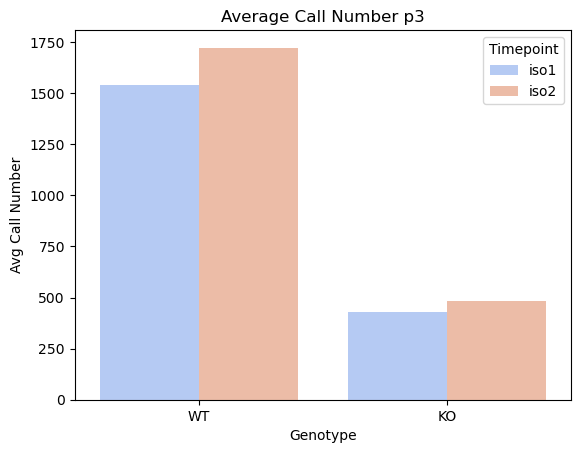

In [36]:
# graph male genotype differences in average call number

sns.barplot(data = pup_df_g,x = 'Genotype',y='File',hue='Timepoint', hue_order = ['iso1', 'iso2'],order = ['WT','KO'],palette='coolwarm')
plt.ylabel('Avg Call Number')
plt.xlabel('Genotype')
plt.title('Average Call Number p3')   


In [37]:
# graph male genotype differences in call number over time
first_min_ind = pup_df.index[(pup_df['Begin Time (s)'] >= 0) & (pup_df['Begin Time (s)'] <= 60)] #get indexes from time range
pup_df.loc[first_min_ind, 'Minute'] = 1 # add label for graphing to indicate timepoint

sec_min_ind = pup_df.index[(pup_df['Begin Time (s)'] >= 61) & (pup_df['Begin Time (s)'] <= 120)]
pup_df.loc[sec_min_ind, 'Minute'] = 2

thrd_min_ind = pup_df.index[(pup_df['Begin Time (s)'] >= 121) & (pup_df['Begin Time (s)'] <= 180)]
pup_df.loc[thrd_min_ind, 'Minute'] = 3

four_min_ind = pup_df.index[(pup_df['Begin Time (s)'] >= 181) & (pup_df['Begin Time (s)'] <= 300)]
pup_df.loc[four_min_ind, 'Minute'] = 4

pup_df_min_g = pup_df.groupby(['Genotype','Timepoint','Minute']).count() # count number of calls per minute
pup_df_min_g = pup_df_min_g.reset_index() # adds indices back to columns for graphing
pup_df_min_g


,Genotype,Timepoint,Minute,File,ID,Label,Accepted,Score,Begin Time (s),End Time (s),...,Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz),Rat
0,KO,iso1,1.0,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,61
1,KO,iso1,2.0,113,113,113,113,113,113,113,...,113,113,113,113,113,113,113,113,113,113
2,KO,iso1,3.0,55,55,55,55,55,55,55,...,55,55,55,55,55,55,55,55,55,55
3,KO,iso1,4.0,195,195,195,195,195,195,195,...,195,195,195,195,195,195,195,195,195,195
4,KO,iso2,1.0,95,95,95,95,95,95,95,...,95,95,95,95,95,95,95,95,95,95
5,KO,iso2,2.0,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
6,KO,iso2,3.0,113,113,113,113,113,113,113,...,113,113,113,113,113,113,113,113,113,113
7,KO,iso2,4.0,208,208,208,208,208,208,208,...,208,208,208,208,208,208,208,208,208,208
8,WT,iso1,1.0,287,287,287,287,287,287,287,...,287,287,287,287,287,287,287,287,287,287
9,WT,iso1,2.0,275,275,275,275,275,275,275,...,275,275,275,275,275,275,275,275,275,275


Text(0.5, 1.0, 'Avg Call per Minute Male')

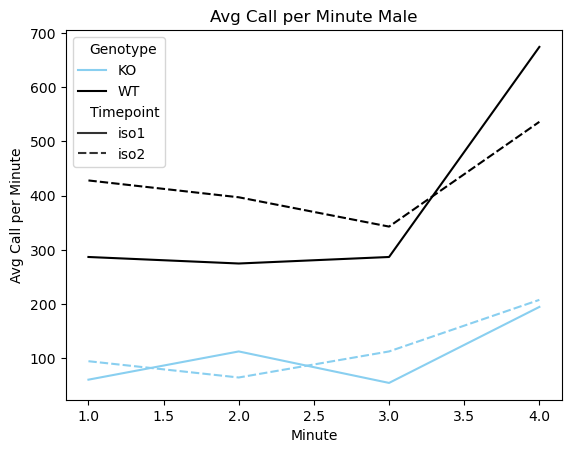

In [38]:
# cont
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=pup_df_min_g,x='Minute',y='ID',hue='Genotype',style='Timepoint',hue_order=['KO','WT'])
plt.ylabel('Avg Call per Minute')
plt.xlabel('Minute')
plt.title('Avg Call per Minute Male') 

Text(0.5, 1.0, 'Avg Call per Minute 1st Isolation')

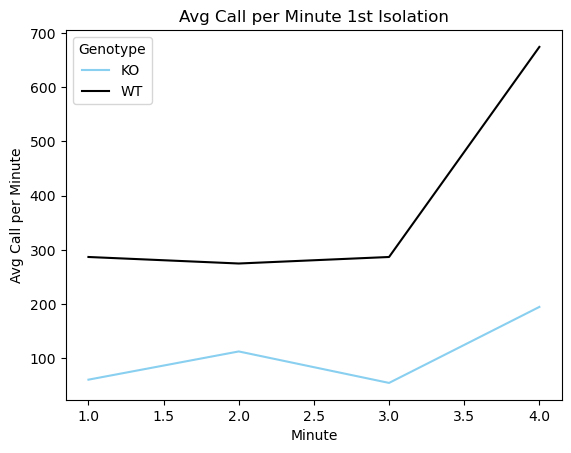

In [39]:
# graph just pre-mom
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
test = pup_df_min_g.loc[pup_df_min_g['Timepoint'] == 'iso1']
sns.lineplot(data=test,x='Minute',y='ID',hue='Genotype')
plt.ylabel('Avg Call per Minute')
plt.xlabel('Minute')
plt.title('Avg Call per Minute 1st Isolation') 

Text(0.5, 1.0, 'Avg Call per Minute 2nd Isolation')

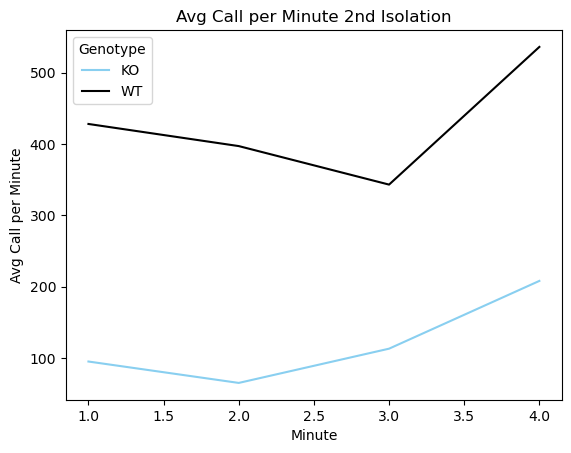

In [40]:
# graph just post-mom
test = pup_df_min_g.loc[pup_df_min_g['Timepoint'] == 'iso2']
sns.lineplot(data=test,x='Minute',y='ID',hue='Genotype')
plt.ylabel('Avg Call per Minute')
plt.xlabel('Minute')
plt.title('Avg Call per Minute 2nd Isolation') 

# Duration Comparison

Text(0.5, 1.0, 'Avg Duration')

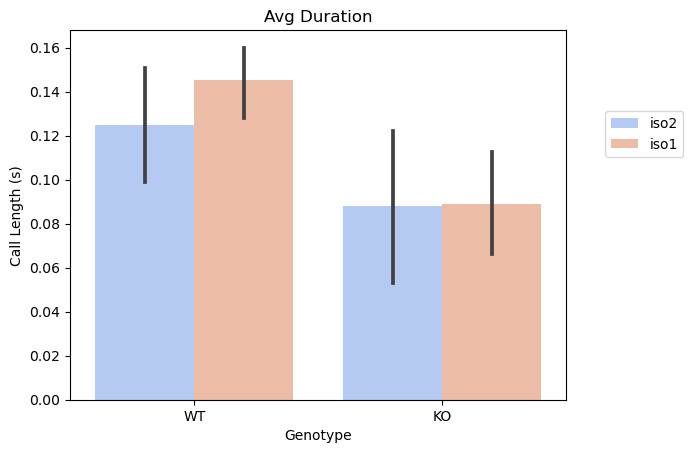

In [41]:
#both sexes
sns.barplot(data=pup_df_rat_avg,x='Genotype',y='Call Length (s)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Duration') 

Text(0.5, 1.0, 'Avg Duration per Minute')

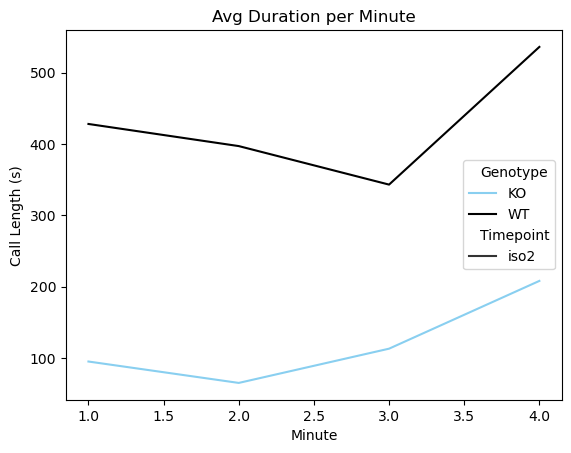

In [42]:
# duration over time both
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Call Length (s)',hue='Genotype',style='Timepoint')
plt.title('Avg Duration per Minute') 

# Principal Freq

In [43]:
pup_df
test = pup_df.reset_index()
test

,index,File,ID,Label,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),...,Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz),Genotype,Rat,Timepoint,Minute
0,0,D:\Rat Pup call analysis\litter le 16 fmr1\p6\...,1,Flat,True,0.663786,0.066253,0.118018,0.051765,39.141329,...,0.283794,0.881980,1.020711,-81.251688,0.497346,39.141329,WT,581,iso1,1.0
1,1,D:\Rat Pup call analysis\litter le 16 fmr1\p6\...,2,Usv,True,0.785730,0.261688,0.308859,0.047171,38.799453,...,0.442956,6.590278,1.200113,-80.913806,0.691142,38.799453,WT,581,iso1,1.0
2,2,D:\Rat Pup call analysis\litter le 16 fmr1\p6\...,3,Flat,True,0.686565,3.625242,3.668206,0.042965,38.234797,...,0.150541,2.583063,1.093011,-85.867773,0.619020,38.490053,WT,581,iso1,1.0
3,3,D:\Rat Pup call analysis\litter le 16 fmr1\p6\...,4,Flat,True,0.712170,3.797822,3.889587,0.091765,39.853491,...,0.647557,-15.761049,1.182894,-73.310345,0.786215,40.913342,WT,581,iso1,1.0
4,4,D:\Rat Pup call analysis\litter le 16 fmr1\p6\...,5,Flat,True,0.717449,3.994546,4.184364,0.189818,39.930425,...,0.570155,0.781058,1.437578,-74.431837,0.759753,40.411557,WT,581,iso1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4170,278,D:\Rat Pup call analysis\litter le15 fmr1\p6\r...,21,Usv,True,0.791685,137.343577,137.381813,0.038235,40.131705,...,0.585603,-34.828075,1.104252,-94.889522,0.347541,40.457375,KO,568,iso2,4.0
4171,279,D:\Rat Pup call analysis\litter le15 fmr1\p6\r...,22,Usv,True,0.529396,138.018546,138.123722,0.105176,71.495386,...,7.664121,-153.880306,3.832734,-100.120865,0.184409,71.495386,KO,568,iso2,4.0
4172,280,D:\Rat Pup call analysis\litter le15 fmr1\p6\r...,23,Usv,True,0.632794,138.152774,138.201109,0.048335,63.637500,...,11.911238,-338.581649,5.122670,-102.745680,0.187089,68.737500,KO,568,iso2,4.0
4173,281,D:\Rat Pup call analysis\litter le15 fmr1\p6\r...,24,Downward_Ramp,True,0.959838,154.734069,154.827010,0.092941,43.560918,...,1.546142,-53.260751,1.204213,-74.155556,0.754991,45.067247,KO,568,iso2,4.0


Text(0.5, 1.0, 'Avg Principal Frequency')

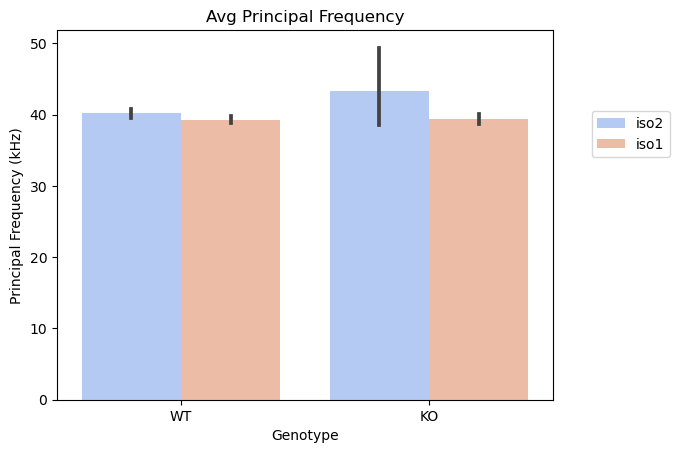

In [44]:
# both sexes
sns.barplot(data=pup_df_rat_avg,x='Genotype',y='Principal Frequency (kHz)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Principal Frequency') 

# Slope Comparison

Text(0.5, 1.0, 'Avg Slope')

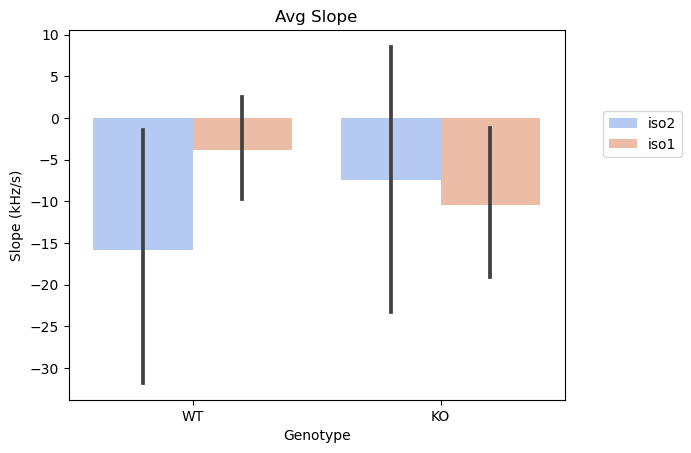

In [45]:
#both sexes
sns.barplot(data=pup_df_rat_avg,x='Genotype',y='Slope (kHz/s)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Slope') 


Text(0.5, 1.0, 'Avg Slope per Minute')

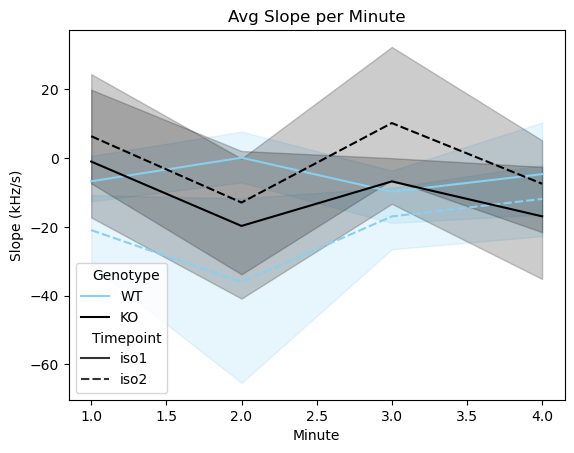

In [46]:
# duration over time both sexes
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Slope (kHz/s)',hue='Genotype',style='Timepoint')
plt.title('Avg Slope per Minute') 

# Delta Frequency 


Text(0.5, 1.0, 'Avg Delta Frequency')

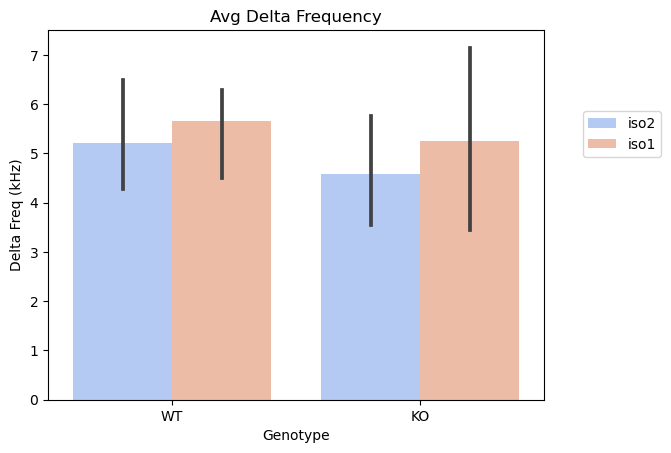

In [47]:
#both sexes
sns.barplot(data=pup_df_rat_avg,x='Genotype',y='Delta Freq (kHz)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Delta Frequency') 


Text(0.5, 1.0, 'Avg Delta Frequency per Minute')

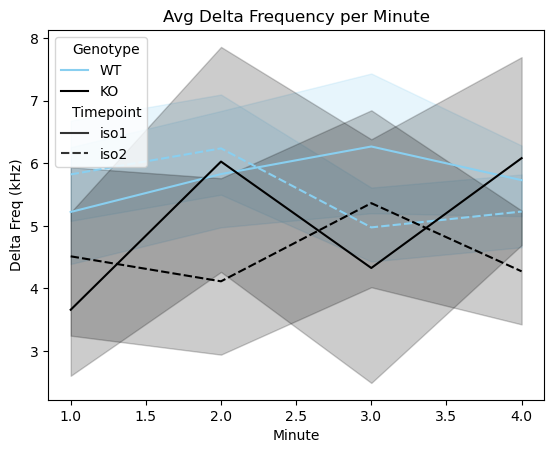

In [48]:
# duration over time both sexes
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Delta Freq (kHz)',hue='Genotype',style='Timepoint')
plt.title('Avg Delta Frequency per Minute') 

# Sinusoity

Text(0.5, 1.0, 'Avg Sinuosity Frequency')

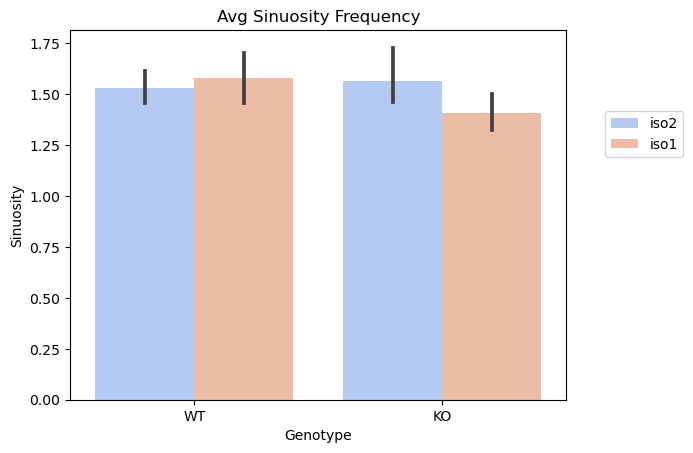

In [49]:
#both sexes
sns.barplot(data=pup_df_rat_avg,x='Genotype',y='Sinuosity',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Sinuosity Frequency')

Text(0.5, 1.0, 'Avg Sinuosity per Minute')

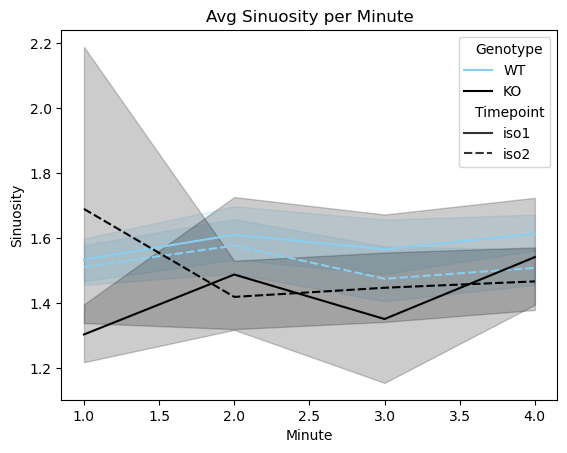

In [50]:
# duration over time both sexes
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Sinuosity',hue='Genotype',style='Timepoint')
plt.title('Avg Sinuosity per Minute') 

# Mean Power


Text(0.5, 1.0, 'Avg Mean Power (dB/Hz)')

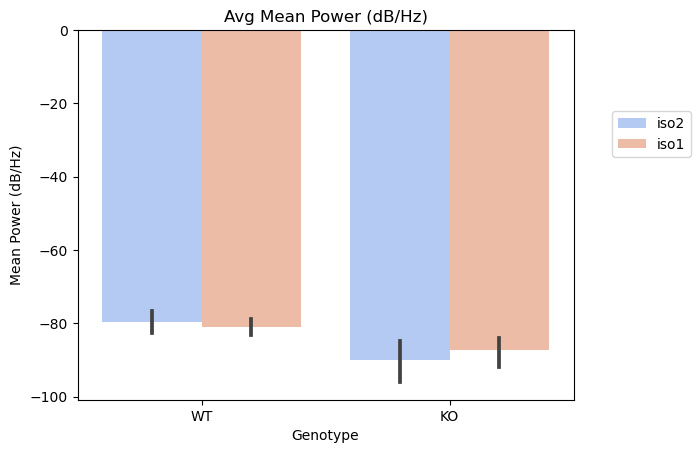

In [51]:
#both sexes
sns.barplot(data=pup_df_rat_avg,x='Genotype',y='Mean Power (dB/Hz)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Mean Power (dB/Hz)')

Text(0.5, 1.0, 'Avg Mean Power per Minute')

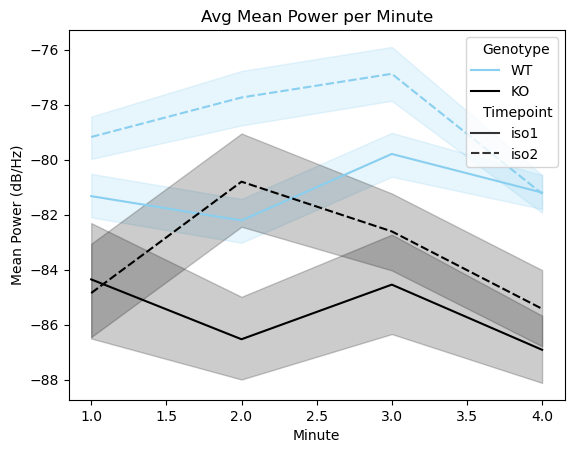

In [52]:
# duration over time both sexes
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Mean Power (dB/Hz)',hue='Genotype',style='Timepoint')
plt.title('Avg Mean Power per Minute') 

# Tonality

Text(0.5, 1.0, 'Avg Tonality')

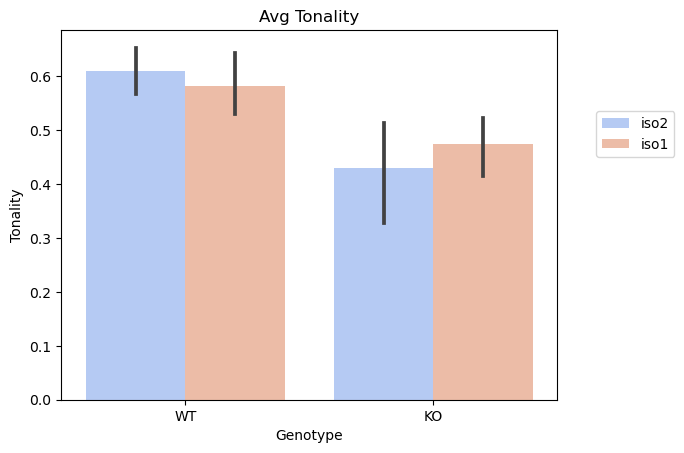

In [53]:
#both sexes
sns.barplot(data=pup_df_rat_avg,x='Genotype',y='Tonality',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Tonality')

Text(0.5, 1.0, 'Avg Tonality per Minute')

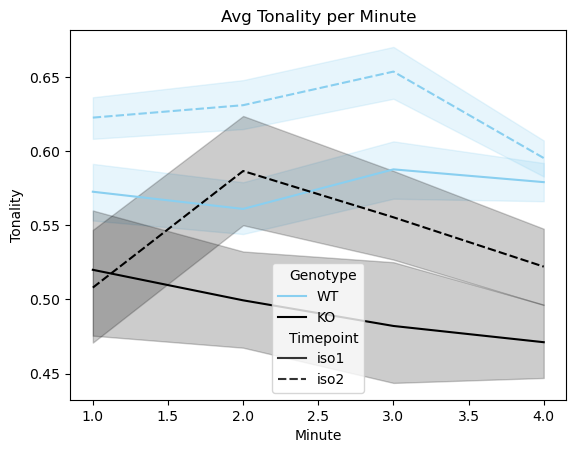

In [54]:
# duration over time both sexes
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Tonality',hue='Genotype',style='Timepoint')
plt.title('Avg Tonality per Minute') 

# Call Type Comparison

In [24]:
# pie chart between wt and het
KO_flat_df = pup_df.loc[pup_df['Genotype'] == 'KO']
wt_flat_df = pup_df.loc[pup_df['Genotype'] == 'WT']
wt_flat_df

,File,ID,Label,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),Low Freq (kHz),...,Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz),Genotype,Timepoint,Minute
0,D:\Rat Pup call analysis\litter le 16 fmr1\p6\...,1,Flat,True,0.663786,0.066253,0.118018,0.051765,39.141329,38.375563,...,1.531532,0.283794,0.881980,1.020711,-81.251688,0.497346,39.141329,WT,iso1,1.0
1,D:\Rat Pup call analysis\litter le 16 fmr1\p6\...,2,Usv,True,0.785730,0.261688,0.308859,0.047171,38.799453,38.227062,...,1.717172,0.442956,6.590278,1.200113,-80.913806,0.691142,38.799453,WT,iso1,1.0
2,D:\Rat Pup call analysis\litter le 16 fmr1\p6\...,3,Flat,True,0.686565,3.625242,3.668206,0.042965,38.234797,37.979542,...,0.510511,0.150541,2.583063,1.093011,-85.867773,0.619020,38.490053,WT,iso1,1.0
3,D:\Rat Pup call analysis\litter le 16 fmr1\p6\...,4,Flat,True,0.712170,3.797822,3.889587,0.091765,39.853491,39.429551,...,2.331671,0.647557,-15.761049,1.182894,-73.310345,0.786215,40.913342,WT,iso1,1.0
4,D:\Rat Pup call analysis\litter le 16 fmr1\p6\...,5,Flat,True,0.717449,3.994546,4.184364,0.189818,39.930425,39.609670,...,2.405660,0.570155,0.781058,1.437578,-74.431837,0.759753,40.411557,WT,iso1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,D:\Rat Pup call analysis\litter le15 fmr1\p6\r...,58,Downward_Ramp,True,0.628594,168.695315,168.742667,0.047353,35.707237,34.391447,...,1.842105,0.565287,-19.030371,1.214420,-90.536272,0.501961,35.970395,WT,iso2,3.0
58,D:\Rat Pup call analysis\litter le15 fmr1\p6\r...,59,Usv,True,0.740898,169.049209,169.077162,0.027953,37.809343,36.950758,...,0.858586,0.433651,-33.849628,1.051777,-90.348330,0.326402,37.809343,WT,iso2,3.0
59,D:\Rat Pup call analysis\litter le15 fmr1\p6\r...,60,Flat,True,0.708760,169.244826,169.284632,0.039806,36.354167,35.520833,...,26.666667,4.072048,-274.152711,1.148535,-91.612879,0.297437,36.354167,WT,iso2,3.0
60,D:\Rat Pup call analysis\litter le15 fmr1\p6\r...,61,Flat,True,0.846622,181.583454,181.647384,0.063929,41.035839,39.549825,...,3.566434,0.829051,23.494932,1.544368,-71.782035,0.775932,41.333042,WT,iso2,4.0


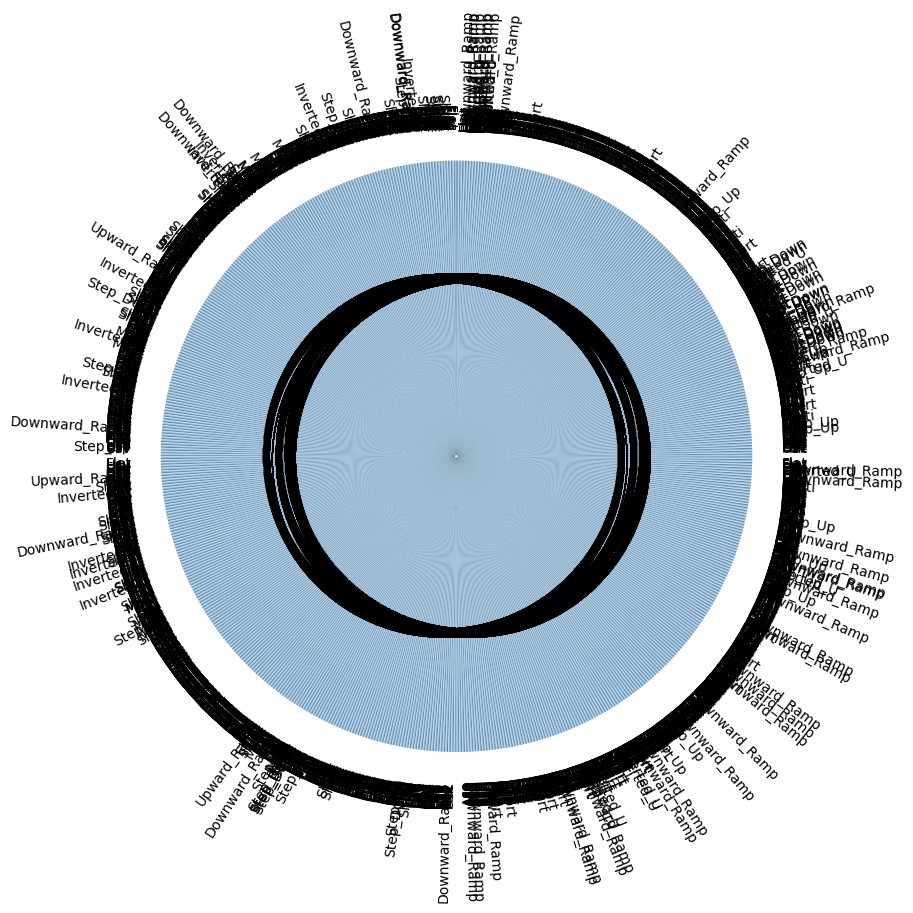

In [25]:
# WT pie chart

wtdata = wt_flat_df['Accepted']
wtdata = np.array(wtdata)
wtlabel = wt_flat_df['Label']
wtlabel = np.array(wtlabel)
colors = ["#B9DDF1", "#9FCAE6", "#73A4CA", "#497AA7", "#2E5B88"]
plt.pie(wtdata, labels = wtlabel,startangle = 90,autopct = '%1.1f%%',rotatelabels = True,colors = colors,radius=2)
plt.show()


<Axes: >

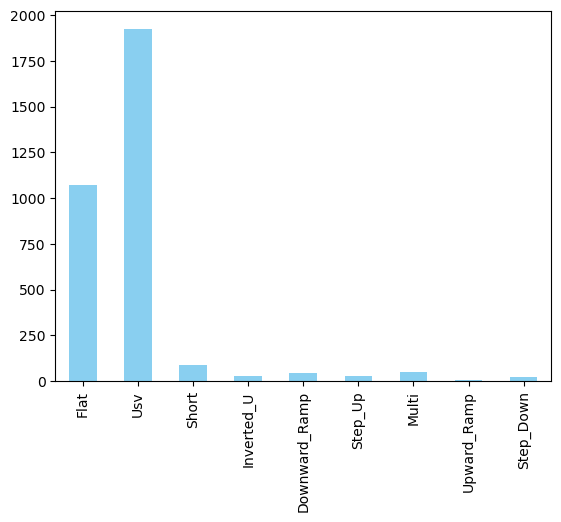

In [55]:
wt_flat_df['Label'].value_counts(sort=False).plot.bar()


<Axes: >

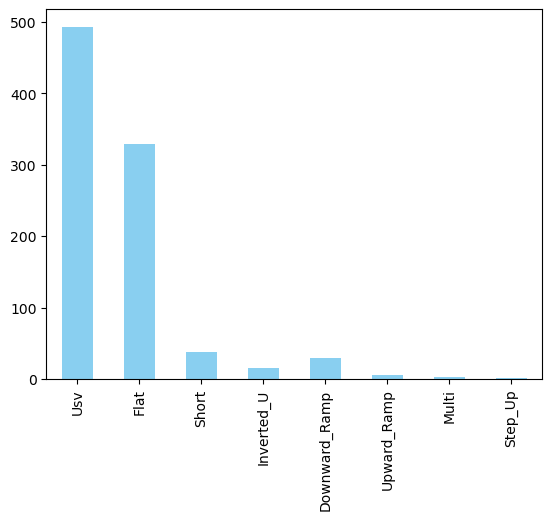

In [57]:
KO_flat_df['Label'].value_counts(sort=False).plot.bar()
